# Segmenting and Clustering Neighborhoods in Toronto

## Part one of the assignment

Importing necessary libraries.

In [1]:
import requests
from bs4 import BeautifulSoup


Getting data from wikipedia

In [2]:
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
response = requests.get(url)

In [3]:
response.content[:500]

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of postal codes of Canada: M - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"YBX77QpAAL0AAnw-VKEAAA'

Creating BeautifulSoup object to parse wanted data

In [18]:
soup = BeautifulSoup(response.content)

In [22]:
table=soup.find('table')
table

<table class="wikitable sortable">
<tbody><tr>
<th>Postal Code
</th>
<th>Borough
</th>
<th>Neighbourhood
</th></tr>
<tr>
<td>M1A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M2A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3A
</td>
<td>North York
</td>
<td>Parkwoods
</td></tr>
<tr>
<td>M4A
</td>
<td>North York
</td>
<td>Victoria Village
</td></tr>
<tr>
<td>M5A
</td>
<td>Downtown Toronto
</td>
<td>Regent Park, Harbourfront
</td></tr>
<tr>
<td>M6A
</td>
<td>North York
</td>
<td>Lawrence Manor, Lawrence Heights
</td></tr>
<tr>
<td>M7A
</td>
<td>Downtown Toronto
</td>
<td>Queen's Park, Ontario Provincial Government
</td></tr>
<tr>
<td>M8A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M9A
</td>
<td>Etobicoke
</td>
<td>Islington Avenue, Humber Valley Village
</td></tr>
<tr>
<td>M1B
</td>
<td>Scarborough
</td>
<td>Malvern, Rouge
</td></tr>
<tr>
<td>M2B
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3B
</td>
<td

Getting the data from wiki's table into one list, since all table columns have same html tag.

In [23]:
res_list=table.find_all('td')

Separating only text values from list

In [24]:
res_list=[rec.text.strip() for rec in res_list]

In [25]:
res_list[:10]

['M1A',
 'Not assigned',
 'Not assigned',
 'M2A',
 'Not assigned',
 'Not assigned',
 'M3A',
 'North York',
 'Parkwoods',
 'M4A']

Now i will prepare 3 separate lists for PostaCode, Borough and Neighbourhood. From those lists DataFrame will be created

In [26]:
postal_codes=res_list[::3]
borough = res_list[1::3]
neighbourhood=res_list[2::3]


In [27]:
import pandas as pd


In [28]:
df=pd.DataFrame({'PostalCode':postal_codes, 'Borough':borough, 'Neighbourhood':neighbourhood})

In [29]:
df.head(10)

,PostalCode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


Cleening rows where Borough is not assigned.

In [30]:
df=df[df["Borough"]!='Not assigned']


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

In the assignment is mentioned that in the wiki table some postal codes are mentioned more than just once. But it is not true. Following chart is a proof of it.

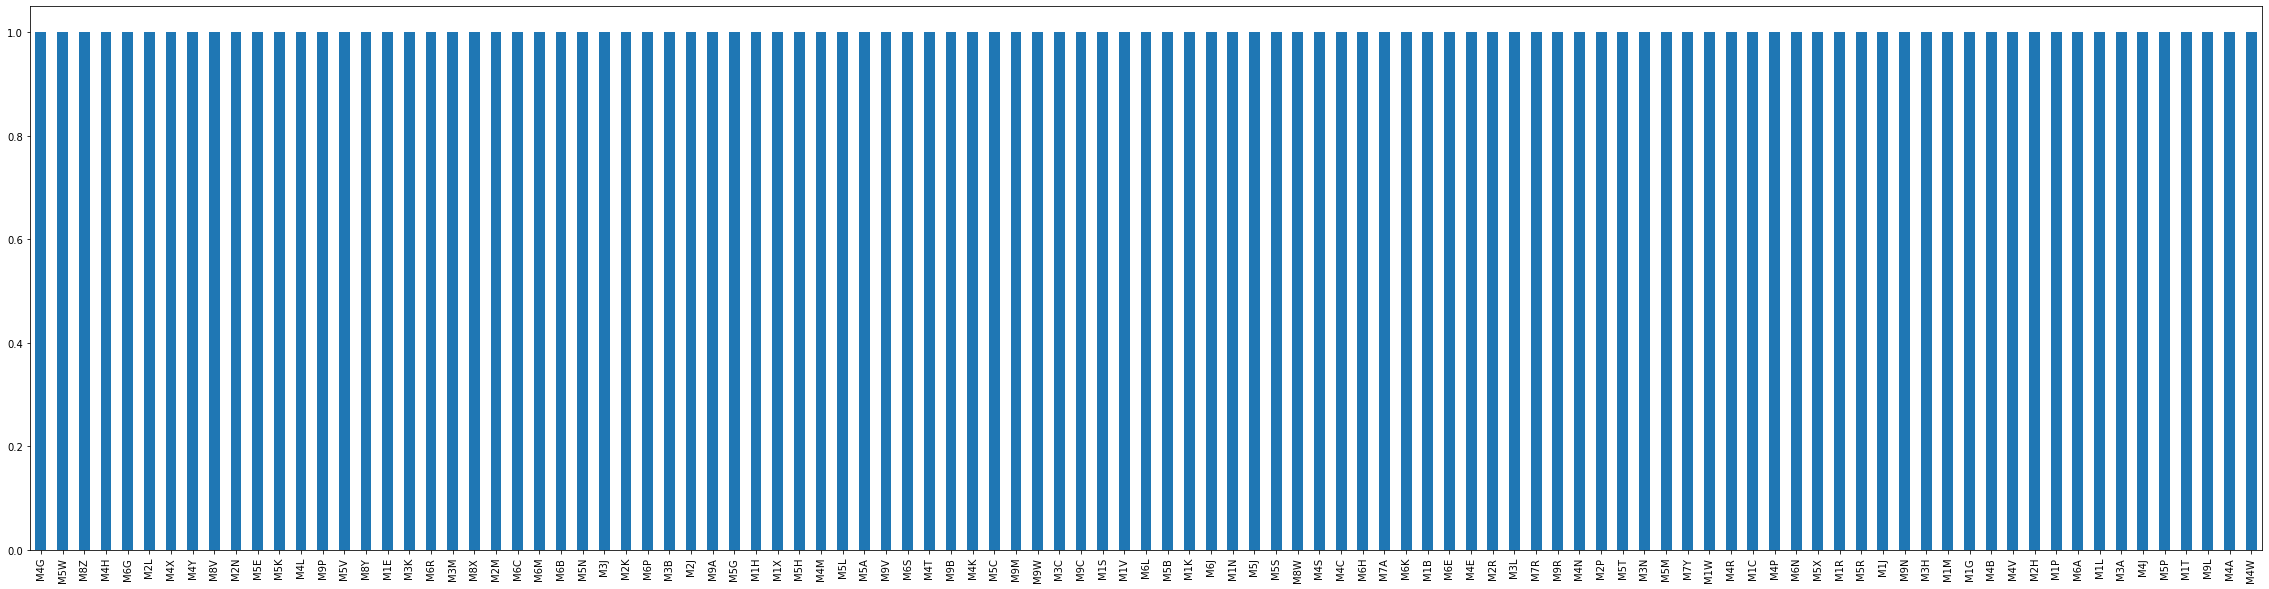

In [32]:
df['PostalCode'].value_counts().plot(kind='bar',figsize=(40,10))

In the assignment there is also a request to replace Boroughs name in Neighbourhood if Neighbourhood is no assigned. But there is no such issue. That is why there is an error in following cell. It seems somone already adjust the table on wikipedia according to the assignment.

In [33]:
(df['Neighbourhood']).value_counts()['Not assigned']

KeyError: 'Not assigned'

now i am just reindexing. Then it is done.

In [34]:
df=df.reindex()


### And folowing cells show an answer for 1st question

In [35]:
print('Number of rows in dataframe is:',df.shape[0])

Number of rows in dataframe is: 103


## Part two of the assignment

In [36]:
import geocoder

I have tried geocoders. it does not seem to work. So I am using CSV instaed

In [37]:
file='Geospatial_Coordinates.csv'
locations=pd.read_csv(file)

In [38]:
locations

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [47]:
df.sort_values('PostalCode',inplace=True)
df.reset_index(inplace=True)

In [49]:
df['Latitude']=locations['Latitude']
df['Longitude']=locations['Longitude']

In [54]:
df.drop('index',axis=1,inplace=True)

### folowing cells show an answer for 2st question

In [56]:
df

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437
